<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

## Problem Statement

Our town mayor is looking to improve the educational outcomes for high school graduates. This is a very broad directive, and so to narrow the scope of inquiry I chose to use nationwide SAT and ACT score and participation data for each state to inform an assessment of how well a given state is performing.  I sought to determine how participation rate might associate with score and then identify states that are performing either particularly well or particularly poorly so that the characteristics and policies of these states can be examined in greater detail.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Choosing Data

The datasets that I choose to use are:

* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State

These datatests include score and participation information for each state for either the SAT or the ACT.

### Outside Research

Upon an overview of the information and statistics most readily accessible online, it appears that this is insufficient understanding of the relationship between participation and test scores.  This may lead to unreliable information being disseminated online.

For instance, in the article below, scores are quoted in an authoritative tone but with no reference to the participation rates.

https://worldpopulationreview.com/state-rankings/public-school-rankings-by-state 

### Preliminary Function Creation

Creating a function for the mean:

In [1]:
def mean(nums_list):
    return sum(nums_list)/len(nums_list)

Below is a function created for the calculation of the standard deviation.

In [2]:
# Code:
def std_dev(numbers):
    mu = mean(numbers)
    n = len(numbers)
    return sum([((number - mu)**2)/n for number in numbers])**.5
 
std_dev([1,2,3,4,5,6,7,8])

2.29128784747792

I created a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' should return 0.5, '30.5%' should return 0.305, etc.

In [3]:
def pct_dec(pct):
    #note that this function only works for percentages between 0 and 100.
    #get rid of percentage sign 
    pct = pct[:-1]
    
    #partition at the decimal, left pad zeros till there are three digits 
    left_dec_3 = pct.split(".")[0].zfill(3)
    
    #convert the string to float
    if len(pct.split("."))==2:
        return float(f'{left_dec_3[0]}.{left_dec_3[1:]}{pct.split(".")[1]}')
    else:
        return float(f'{left_dec_3[0]}.{left_dec_3[1:]}')
    
print(f'{pct_dec("100%")} {pct_dec(".1%")} {pct_dec("32.09%")}')

1.0 0.001 0.3209


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pprint

## Data Import and Cleaning

Importing data:

In [5]:
sat_ca = pd.read_csv('../data/sat_2019_ca.csv')
sat_major = pd.read_csv('../data/sat_2019_by_intended_college_major.csv')
sat_2017 = pd.read_csv('../data/sat_2017.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')
sat_2019 = pd.read_csv('../data/sat_2019.csv')

act_2017 = pd.read_csv('../data/act_2017.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')
act_2019 = pd.read_csv('../data/act_2019.csv')

Displaying data:

In [6]:
print(
f'sat_2017: \n{sat_2017.head()}\n\
sat_2018: \n{sat_2018.head()}\n\
sat_2019: \n{sat_2019.head()}\n\
act_2017: \n{act_2017.head()}\n\
act_2018: \n{act_2018.head()}\n\
act_2019: \n{act_2019.head()}\n\
' )

sat_2017: 
        State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            5%                                 593   572   1165
1      Alaska           38%                                 547   533   1080
2     Arizona           30%                                 563   553   1116
3    Arkansas            3%                                 614   594   1208
4  California           53%                                 531   524   1055
sat_2018: 
        State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California           60%                                 540   536   1076
sat_2019: 
        State Participation Rate  EBRW  Mat

2. Check for missing values.

In [7]:
print(
f'missing values by dataset:\n\
sat_2017: \n{[sum(sat_2017.isna()[col]) for col in sat_2017.columns]}\n\
sat_2018: \n{[sum(sat_2018.isna()[col]) for col in sat_2018.columns]}\n\
sat_2019: \n{[sum(sat_2019.isna()[col]) for col in sat_2019.columns]}\n\
act_2017: \n{[sum(act_2017.isna()[col]) for col in act_2017.columns]}\n\
act_2018: \n{[sum(act_2018.isna()[col]) for col in act_2018.columns]}\n\
act_2019: \n{[sum(act_2019.isna()[col]) for col in act_2019.columns]}\n\
' )

missing values by dataset:
sat_2017: 
[0, 0, 0, 0, 0]
sat_2018: 
[0, 0, 0, 0, 0]
sat_2019: 
[0, 0, 0, 0, 0]
act_2017: 
[0, 0, 0, 0, 0, 0, 0]
act_2018: 
[0, 0, 0]
act_2019: 
[0, 0, 0]



3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).


In [8]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


A Science score of 2.3 for Maryland is bizarre, and must be a typo.  I found source data:
https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf
and I will use the value that they have of 23.2

In [9]:
act_2017.iloc[21,5] = 23.2
act_2017.iloc[21,5]

23.2

In [10]:
# act_2018.describe() act_2019.describe()
for act_yr in [act_2017,act_2018,act_2019]:
    print(f' {act_yr.describe()}')

          English       Math    Reading    Science
count  52.000000  52.000000  52.000000  52.000000
mean   20.919231  21.173077  22.001923  21.442308
std     2.332132   1.963602   2.048672   1.723351
min    16.300000  18.000000  18.100000  18.200000
25%    19.000000  19.400000  20.475000  19.975000
50%    20.550000  20.900000  21.700000  21.300000
75%    23.300000  23.100000  24.125000  23.200000
max    25.500000  25.300000  26.000000  24.900000
        Composite
count  52.000000
mean   21.544231
std     2.119417
min    17.700000
25%    19.975000
50%    21.300000
75%    23.725000
max    25.600000
        Composite
count  52.000000
mean   21.450000
std     2.175487
min    17.900000
25%    19.800000
50%    20.950000
75%    23.650000
max    25.500000


I'm not seeing any outrageous values for the ACT.

In [11]:
for sat_yr in [sat_2017,sat_2018,sat_2019]:
    print(f' {sat_yr.describe()}')

        Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           569.117647  547.627451  1126.098039
std                             45.666901   84.909119    92.494812
min                            482.000000   52.000000   950.000000
25%                            533.500000  522.000000  1055.500000
50%                            559.000000  548.000000  1107.000000
75%                            613.000000  599.000000  1212.000000
max                            644.000000  651.000000  1295.000000
        Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           563.686275  556.235294  1120.019608
std                             47.502627   47.772623    94.155083
min                            480.000000  480.000000   977.000000
25%                            534.500000  522.500000  1057.

Noting that the count is 53 for the 2019 SAT, I investigated and found that this dataset includes scores for Puerto Rico and the Virgin Islands.  I will remove these datapoints since they don't have participation percentages.

In [12]:
sat_2019.drop([39,47],inplace = True)
sat_2019

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065
5,Colorado,100%,518,506,1024
6,Connecticut,100%,529,516,1046
7,Delaware,100%,499,486,985
8,District of Columbia,94%,495,480,975
9,Florida,100%,516,483,999


Again, I'm not seeing any outliers for the SAT data.


In [13]:
act_2018.describe()

,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


Note that the values are all numeric and within a couple standard deviations. However looking into the counts, Act_2018 has two rows for Maine.

In [14]:
act_2018

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of columbia,32%,23.6
9,Florida,66%,19.9


District of columbia should be changed to District of Columbia, with Columbia uppercase.

4. Fix any errors you identified in steps 2-3.


In [15]:
act_2018.loc[act_2018['State']=='District of columbia','State'] = 'District of Columbia'

In [16]:
act_2018.drop_duplicates(inplace=True)
act_2018.describe()

,Composite
count,51.000000
mean,21.496078
std,2.111583
min,17.700000
25%,19.950000
50%,21.300000
75%,23.650000
max,25.600000


In [17]:
act_2017.iloc[21,5] = 23.2
act_2017.iloc[21,5]

23.2

5. Display the data types of each feature.


In [18]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

Fixing datatypes:

In [19]:
act_2017.dtypes
act_2017.Composite[51] = 20.2
act_2017.Composite = act_2017.Composite.astype(float)


/var/folders/jl/p0b83vx55ls1hskdgz1sddkw0000gn/T/ipykernel_73465/2256651558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_2017.Composite[51] = 20.2


It looks `act_2017.Composite` like Composite was turned into an object dtype since the last row had a value with an 'x' appended.  I removed the x and converted the column to float.

In [20]:
sat_2019.columns

Index(['State', 'Participation Rate', 'EBRW', 'Math', 'Total'], dtype='object')

In [21]:
sat_2019.rename(columns={'Participation Rate':'Participation'}, inplace = True)
sat_2017.rename(columns={'Evidence-Based Reading and Writing':'EBRW'}, inplace = True)
sat_2018.rename(columns={'Evidence-Based Reading and Writing':'EBRW'}, inplace = True)

Percentage to proportion:

In [22]:
data_list = [act_2017,act_2018,act_2019,sat_2017,sat_2018, sat_2019]
for t_y in data_list:
    print(t_y.dtypes)

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object
State             object
Participation     object
Composite        float64
dtype: object
State             object
Participation     object
Composite        float64
dtype: object
State            object
Participation    object
EBRW              int64
Math              int64
Total             int64
dtype: object
State            object
Participation    object
EBRW              int64
Math              int64
Total             int64
dtype: object
State            object
Participation    object
EBRW              int64
Math              int64
Total             int64
dtype: object


In [23]:
data_list = [act_2017,act_2018,act_2019,sat_2017,sat_2018, sat_2019]
for t_y in data_list:
    if t_y['Participation'].dtype != float:
        t_y['Participation'] = [pct_dec(p) for p in t_y['Participation']]

I converted Participation from a percentage to a float type proportion.

Renaming Columns:

In [24]:
sat_2019.rename(columns={'Participation Rate':'Participation'}, inplace = True)
sat_2017.rename(columns={'Evidence-Based Reading and Writing':'EBRW'}, inplace = True)
sat_2018.rename(columns={'Evidence-Based Reading and Writing':'EBRW'}, inplace = True)

This was done above while preparing the participation column to be converted to proportion from percentage. Code repeated right above.  The changes were made for the sake of brevity.

In [25]:
act_2017_national = act_2017.iloc[0,]
act_2017_national
act_2017 = act_2017.iloc[1:,]

To keep consisent accross years, I dropped national from 2017 and put the row in a variable `act_2017_national` in case it is
needed later.

Now for a quick EDA detour.  I want to see if there is much value in keeping score categories or if I can make do with a simpler dataframe based only on composite scores.

In [26]:
sat_2017.corr()

,Participation,EBRW,Math,Total
Participation,1.000000,-0.874326,-0.566558,-0.867540
EBRW,-0.874326,1.000000,0.628405,0.996661
Math,-0.566558,0.628405,1.000000,0.632648
Total,-0.867540,0.996661,0.632648,1.000000


I've noticed here that the math correlation apears to be an aberration.  Upon investigating and corroborating with the College Board data, we find that the Math score for Maryland was missing its last digit.

In [27]:
sat_2017.corr()
sat_2017.loc[sat_2017['State']=='Maryland','Math'] = 524

In [28]:
sat_2017[sat_2017['State']=='Maryland']["Math"]

20    524
Name: Math, dtype: int64

I've noticed that Maryland's 2017 sat math score is incorrect.  I'll investigate:
according to :
https://reports.collegeboard.org/media/pdf/2017-maryland-sat-suite-of-assessments-annual-report.pdf

Maryland's Math section score was 524.

In [29]:
sat_2017.loc[sat_2017['State']=='Maryland','Math'] = 524
sat_2017[sat_2017['State']=='Maryland']["Math"]
sat_2017.corr()

,Participation,EBRW,Math,Total
Participation,1.000000,-0.874326,-0.855091,-0.867540
EBRW,-0.874326,1.000000,0.987056,0.996661
Math,-0.855091,0.987056,1.000000,0.996822
Total,-0.867540,0.996661,0.996822,1.000000


From examining the correlation matrices, I believe it is safe to use total and composite columns as capturing what we know about test performance.

In [30]:
data_list = [act_2017,act_2018,act_2019,sat_2017,sat_2018, sat_2019]

In [31]:
for act_yr in [act_2017,act_2018,act_2019]:
    try:
        act_yr.drop(columns=['English','Math','Reading','Science'], inplace = True)
    except KeyError:
        pass
    act_yr.rename(columns={'Participation':'ACT_Participation','Composite':'ACT_Score'},inplace=True)

In [32]:
for sat_yr in [sat_2017,sat_2018,sat_2019]:
    try:
        sat_yr.drop(columns=['EBRW','Math'], inplace = True)
    except KeyError:
        print('KeyError') 
    try:
        sat_yr.rename(columns={'Total':'SAT_Score','Participation':'SAT_Participation'}, inplace = True)
    except KeyError:
        print('KeyError')

In [33]:
print(act_2017.columns,sat_2017.columns)

Index(['State', 'ACT_Participation', 'ACT_Score'], dtype='object') Index(['State', 'SAT_Participation', 'SAT_Score'], dtype='object')


In [34]:
act_2017.rename(columns = {"ACT_Participation":"2017_ACT_Participation",
                           "ACT_Score":"2017_ACT_Score"}, inplace =True)
act_2018.rename(columns = {"ACT_Participation":"2018_ACT_Participation",
                           "ACT_Score":"2018_ACT_Score"}, inplace =True)
act_2019.rename(columns = {"ACT_Participation":"2019_ACT_Participation",
                           "ACT_Score":"2019_ACT_Score"}, inplace =True)
sat_2017.rename(columns = {"SAT_Participation":"2017_SAT_Participation",
                           "SAT_Score":"2017_SAT_Score"}, inplace =True)
sat_2018.rename(columns = {"SAT_Participation":"2018_SAT_Participation",
                           "SAT_Score":"2018_SAT_Score"}, inplace =True)
sat_2019.rename(columns = {"SAT_Participation":"2019_SAT_Participation",
                           "SAT_Score":"2019_SAT_Score"}, inplace =True)

With the above columns renamed, the dataframes are ready to be merged

9. Merge dataframes that can be merged.

I decided to merge all these dataframes with an inner join on 'State'.

In [35]:
test=act_2017.merge(sat_2017, on = 'State').merge(act_2018, on = 'State')\
.merge(sat_2018, on = 'State').merge(act_2019, on = 'State').merge(sat_2019, on = 'State')

In [36]:
test.to_csv("../data/test_df.csv")

In [37]:
test_df = pd.read_csv("../data/test_df.csv")

In [38]:
test_df.set_index("State", inplace = True)

In [39]:
test_df.drop("Unnamed: 0",axis=1,inplace=True)

In [40]:
test_df['ACT_Score_Avg'] = test_df[['2017_ACT_Score','2018_ACT_Score', '2019_ACT_Score']].mean(axis = 1)
test_df['SAT_Score_Avg'] = test_df[['2017_SAT_Score','2018_SAT_Score', '2019_SAT_Score']].mean(axis = 1)
test_df['SAT_Part_Avg'] = test_df[['2017_SAT_Participation','2018_SAT_Participation', '2019_SAT_Participation']].mean(axis = 1)
test_df['ACT_Part_Avg'] = test_df[['2017_ACT_Participation','2018_ACT_Participation', '2019_ACT_Participation']].mean(axis = 1)
test_df

,2017_ACT_Participation,2017_ACT_Score,2017_SAT_Participation,2017_SAT_Score,2018_ACT_Participation,2018_ACT_Score,2018_SAT_Participation,2018_SAT_Score,2019_ACT_Participation,2019_ACT_Score,2019_SAT_Participation,2019_SAT_Score,ACT_Score_Avg,SAT_Score_Avg,SAT_Part_Avg,ACT_Part_Avg
State,,,,,,,,,,,,,,,,
Alabama,1.00,19.2,0.05,1165,1.00,19.1,0.06,1166,1.00,18.9,0.07,1143,19.066667,1158.000000,0.060000,1.000000
Alaska,0.65,19.8,0.38,1080,0.33,20.8,0.43,1106,0.38,20.1,0.41,1097,20.233333,1094.333333,0.406667,0.453333
Arizona,0.62,19.7,0.30,1116,0.66,19.2,0.29,1149,0.73,19.0,0.31,1134,19.300000,1133.000000,0.300000,0.670000
Arkansas,1.00,19.4,0.03,1208,1.00,19.4,0.05,1169,1.00,19.3,0.06,1141,19.366667,1172.666667,0.046667,1.000000
California,0.31,22.8,0.53,1055,0.27,22.7,0.60,1076,0.23,22.6,0.63,1065,22.700000,1065.333333,0.586667,0.270000
Colorado,1.00,20.8,0.11,1201,0.30,23.9,1.00,1025,0.27,23.8,1.00,1024,22.833333,1083.333333,0.703333,0.523333
Connecticut,0.31,25.2,1.00,1041,0.26,25.6,1.00,1053,0.22,25.5,1.00,1046,25.433333,1046.666667,1.000000,0.263333
Delaware,0.18,24.1,1.00,996,0.17,23.8,1.00,998,0.13,24.1,1.00,985,24.000000,993.000000,1.000000,0.160000
District of Columbia,0.32,24.2,1.00,950,0.32,23.6,0.92,977,0.32,23.5,0.94,975,23.766667,967.333333,0.953333,0.320000


In [41]:
test_df.to_csv("../data/test_df.csv")

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|State|object|test_df|The state to which the observations pertain|
|2017_ACT_Participation|float|test_df|Proportion of the state's 2017 HS graduates who took the ACT| 
|2017_SAT_Participation|float|test_df|Proportion of the state's 2017 HS graduates who took the SAT|
|2017_ACT_Score|float|test_df|Mean ACT Composite score of the state's 2017 HS graduates|
|2018_ACT_Score|float|test_df|Mean ACT Composite score of the state's 2018 HS graduates|
|2019_ACT_Score|float|test_df|Mean ACT Composite score of the state's 2019 HS graduates|
|2017_SAT_Score|float|test_df|Mean SAT Total score of the state's 2017 HS graduates|
|2018_SAT_Score|float|test_df|Mean SAT Total score of the state's 2018 HS graduates|
|2019_SAT_Score|float|test_df|Mean SAT Total score of the state's 2019 HS graduates|
|ACT_Score_Avg|float|test_df|Mean of statewide ACT scores across 2017, 2018 and 2019|
|SAT_Score_Avg|float|test_df|Mean of statewide SAT scores across 2017, 2018 and 2019|
|ACT_Part_Avg|float|test_df|Mean of statewide ACT participation across 2017, 2018 and 2019|
|SAT_Part_Avg|float|test_df|Mean of statewide SAT participation across 2017, 2018 and 2019|

## Exploratory Data Analysis

Below is a quick look at the summary statistics of the data.

In [42]:
test_df.describe()

,2017_ACT_Participation,2017_ACT_Score,2017_SAT_Participation,2017_SAT_Score,2018_ACT_Participation,2018_ACT_Score,2018_SAT_Participation,2018_SAT_Score,2019_ACT_Participation,2019_ACT_Score,2019_SAT_Participation,2019_SAT_Score,ACT_Score_Avg,SAT_Score_Avg,SAT_Part_Avg,ACT_Part_Avg
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,21.519608,0.398039,1126.098039,0.617255,21.496078,0.457451,1120.019608,0.586667,21.464706,0.490588,1113.078431,21.493464,1119.732026,0.448693,0.618824
std,0.321408,2.020695,0.352766,92.494812,0.340371,2.111583,0.373143,94.155083,0.345159,2.194523,0.387476,97.197910,2.078130,90.974771,0.357529,0.328698
min,0.080000,17.800000,0.020000,950.000000,0.070000,17.700000,0.020000,977.000000,0.060000,17.900000,0.020000,943.000000,17.800000,967.333333,0.020000,0.070000
25%,0.310000,19.800000,0.040000,1055.500000,0.285000,19.950000,0.045000,1057.500000,0.245000,19.800000,0.055000,1038.000000,19.966667,1056.000000,0.045000,0.280000
50%,0.690000,21.400000,0.380000,1107.000000,0.660000,21.300000,0.520000,1098.000000,0.540000,21.100000,0.540000,1097.000000,21.400000,1094.333333,0.506667,0.643333
75%,1.000000,23.600000,0.660000,1212.000000,1.000000,23.650000,0.775000,1204.000000,1.000000,23.700000,0.820000,1210.000000,23.400000,1200.166667,0.726667,0.990000
max,1.000000,25.500000,1.000000,1295.000000,1.000000,25.600000,1.000000,1298.000000,1.000000,25.500000,1.000000,1284.000000,25.466667,1292.333333,1.000000,1.000000


From examining the above, it is interesting to note that the mean participation on the ACT is declining year over year while the participation on the SAT is increassing year over year.  ACT Participation declined from .653 to .587 while
SAT participation increased from .398 to .491. Surprisingly, ACT scores decreased slighly from 21.52 to 21.46 and SAT
scores decreased rom 1126 to 1113.  I would have expected the inverse relationship between participation and scores seen between states to also hold between years.  It does for the SAT, though not for the ACT.

In [43]:
test_df.dtypes
test_df['2017_SAT_Score'] = test_df['2017_SAT_Score'].astype(float)
test_df['2018_SAT_Score'] = test_df['2018_SAT_Score'].astype(float)
test_df['2019_SAT_Score'] = test_df['2019_SAT_Score'].astype(float)

In [44]:
sd = {col:std_dev(test_df.loc[:,col]) for col in test_df.columns\
      if test_df.loc[:,col].dtype==float}
sd

{'2017_ACT_Participation': 0.3182417575123181,
 '2017_ACT_Score': 2.0007860815819893,
 '2017_SAT_Participation': 0.3492907076664507,
 '2017_SAT_Score': 91.58351056778743,
 '2018_ACT_Participation': 0.33701735820410317,
 '2018_ACT_Score': 2.0907790821411787,
 '2018_SAT_Participation': 0.3694661922353942,
 '2018_SAT_Score': 93.22742384464433,
 '2019_ACT_Participation': 0.34175823737030464,
 '2019_ACT_Score': 2.172901153595978,
 '2019_SAT_Participation': 0.3836584048685726,
 '2019_SAT_Score': 96.24027185617864,
 'ACT_Score_Avg': 2.0576550268429536,
 'SAT_Score_Avg': 90.07844607392488,
 'SAT_Part_Avg': 0.3540060671977226,
 'ACT_Part_Avg': 0.32545983794169353}

Above are standard deviations of the features.

Below you will find a more complete set of descriptive statistics.

In [45]:
descriptive_stats={col_name:{'min':min(col_data),'q1':col_data.quantile(.25),'q2':col_data.quantile(.5),\
          'q3':col_data.quantile(.75), 'max':max(col_data),'mean':col_data.mean(),'sd':std_dev(col_data)}\
 for (col_name, col_data) in test_df.iteritems() if col_data.dtypes == float}

In [46]:
pprint.pprint(descriptive_stats)

{'2017_ACT_Participation': {'max': 1.0,
                            'mean': 0.6525490196078431,
                            'min': 0.08,
                            'q1': 0.31,
                            'q2': 0.69,
                            'q3': 1.0,
                            'sd': 0.3182417575123181},
 '2017_ACT_Score': {'max': 25.5,
                    'mean': 21.519607843137255,
                    'min': 17.8,
                    'q1': 19.8,
                    'q2': 21.4,
                    'q3': 23.6,
                    'sd': 2.0007860815819893},
 '2017_SAT_Participation': {'max': 1.0,
                            'mean': 0.39803921568627454,
                            'min': 0.02,
                            'q1': 0.04,
                            'q2': 0.38,
                            'q3': 0.66,
                            'sd': 0.3492907076664507},
 '2017_SAT_Score': {'max': 1295.0,
                    'mean': 1126.0980392156862,
                    'min': 950.0,
  

Investigaing which states have 100% participation:

In [47]:
test_df["2017_ACT_Participation"].sort_values(ascending=False)[0:20]
ACT_2017_full_participation = test_df["2017_ACT_Participation"][test_df["2017_ACT_Participation"]==1].index
ACT_2018_full_participation = test_df["2018_ACT_Participation"][test_df["2018_ACT_Participation"]==1].index
ACT_2019_full_participation = test_df["2019_ACT_Participation"][test_df["2019_ACT_Participation"]==1].index
ACT_full_participation = [ACT_2017_full_participation,ACT_2018_full_participation,ACT_2019_full_participation]

In [48]:
set.intersection(*map(set,ACT_full_participation))

{'Alabama',
 'Arkansas',
 'Kentucky',
 'Louisiana',
 'Mississippi',
 'Montana',
 'Nevada',
 'North Carolina',
 'Oklahoma',
 'Tennessee',
 'Utah',
 'Wisconsin',
 'Wyoming'}

Here we see that Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Montana, Nevada, North Carolina, Oklahoma, Tennessee, Utah, Wisconsin, and Wyoming all have 100 percent participation on the ACT for years 2017, 2018, and 2019.

In [49]:
test_df["2019_ACT_Participation"].sort_values(ascending=True)[0:20]
ACT_2017_low_participation = test_df["2017_ACT_Participation"][test_df["2017_ACT_Participation"]<.2].index
ACT_2018_low_participation = test_df["2018_ACT_Participation"][test_df["2018_ACT_Participation"]<.2].index
ACT_2019_low_participation = test_df["2019_ACT_Participation"][test_df["2019_ACT_Participation"]<.2].index
ACT_low_participation = [ACT_2017_low_participation,ACT_2018_low_participation,ACT_2019_low_participation]
print('ACT Participation under .2 for all years: ')
set.intersection(*map(set,ACT_low_participation))

ACT Participation under .2 for all years: 


{'Delaware', 'Maine', 'New Hampshire'}

When the cutoff is .2, the states with low ACT participation in all three years are 'Delaware', 'Maine', 'New Hampshire'.
Maine consistently has the lowest participation at .08, .07, and .06 for 2017, 2018, and 2019 respectively.

In [50]:
test_df["2018_ACT_Participation"].sort_values(ascending=True).head()

State
Maine            0.07
Rhode Island     0.15
New Hampshire    0.16
Delaware         0.17
Pennsylvania     0.20
Name: 2018_ACT_Participation, dtype: float64

        - Which states have the highest and lowest mean total/composite scores for the 2017, 2018, or 2019 SAT and ACT?


In [51]:
for col in test_df.columns:
    print(f'{col}     min: {test_df.index[np.argmin(test_df[col])]}:{test_df[col].min()} \
    max: {test_df.index[np.argmax(test_df[col])]}:{max(test_df[col])}')

2017_ACT_Participation     min: Maine:0.08     max: Alabama:1.0
2017_ACT_Score     min: Nevada:17.8     max: New Hampshire:25.5
2017_SAT_Participation     min: Iowa:0.02     max: Connecticut:1.0
2017_SAT_Score     min: District of Columbia:950.0     max: Minnesota:1295.0
2018_ACT_Participation     min: Maine:0.07     max: Alabama:1.0
2018_ACT_Score     min: Nevada:17.7     max: Connecticut:25.6
2018_SAT_Participation     min: North Dakota:0.02     max: Colorado:1.0
2018_SAT_Score     min: District of Columbia:977.0     max: Minnesota:1298.0
2019_ACT_Participation     min: Maine:0.06     max: Alabama:1.0
2019_ACT_Score     min: Nevada:17.9     max: Connecticut:25.5
2019_SAT_Participation     min: North Dakota:0.02     max: Colorado:1.0
2019_SAT_Score     min: West Virginia:943.0     max: Minnesota:1284.0
ACT_Score_Avg     min: Nevada:17.8     max: Massachusetts:25.46666666666667
SAT_Score_Avg     min: District of Columbia:967.3333333333334     max: Minnesota:1292.3333333333333
SAT_Part_

Minnesota has the highest SAT scores in 2017, 2018, and 2019.  DC has the lowest SAT scores for 2017 and 2018, while West Virginia has the lowest SAT score for 2019.
Nevada has the lowest ACT scores in all years, while New Hampshire has the highest score in 2017 and Connecticut has the highest scores in 2018 and 2019.

I will examine whether any states with 100% participation on a given test have a rate change year-to-year.

In [52]:
test_df[(test_df['2017_ACT_Participation']==1) & ((test_df['2018_ACT_Participation']!=1) | (test_df['2019_ACT_Participation']!=1))]
[(State,row) for State, row in test_df.iterrows() if ((row['2017_ACT_Participation']==1)|\
                                                       (row['2018_ACT_Participation']==1)|\
                                                       (row['2019_ACT_Participation']==1))&\
(sum([row['2019_ACT_Participation'],row['2018_ACT_Participation'],row['2017_ACT_Participation']])<3)]

[('Colorado',
  2017_ACT_Participation       1.000000
  2017_ACT_Score              20.800000
  2017_SAT_Participation       0.110000
  2017_SAT_Score            1201.000000
  2018_ACT_Participation       0.300000
  2018_ACT_Score              23.900000
  2018_SAT_Participation       1.000000
  2018_SAT_Score            1025.000000
  2019_ACT_Participation       0.270000
  2019_ACT_Score              23.800000
  2019_SAT_Participation       1.000000
  2019_SAT_Score            1024.000000
  ACT_Score_Avg               22.833333
  SAT_Score_Avg             1083.333333
  SAT_Part_Avg                 0.703333
  ACT_Part_Avg                 0.523333
  Name: Colorado, dtype: float64),
 ('Minnesota',
  2017_ACT_Participation       1.000000
  2017_ACT_Score              21.500000
  2017_SAT_Participation       0.030000
  2017_SAT_Score            1295.000000
  2018_ACT_Participation       0.990000
  2018_ACT_Score              21.300000
  2018_SAT_Participation       0.040000
  2018_SAT_Score

ACT - states with non-constant 100% participation rates: 'Colorado', 'Minnesota', 'Missouri', 'Nebraska', 'Ohio', 'South Carolina' all have at least one but not all years with ACT participation of 100%.  Colorado had a marked decrease in participation from 1 to .3 in one year and a large corresponding increase in ACT scores.  The states with only mild changes in participation did not see a marked change in scores.

In [53]:
[(State,row[['2017_SAT_Participation','2017_SAT_Score', '2018_SAT_Participation','2018_SAT_Score',\
            '2019_SAT_Participation','2019_SAT_Score']]) \
 for State, row in test_df.iterrows() if ((row['2017_SAT_Participation']==1)|\
                                                       (row['2018_SAT_Participation']==1)|\
                                                       (row['2019_SAT_Participation']==1))&\
(sum([row['2019_SAT_Participation'],row['2018_SAT_Participation'],row['2017_SAT_Participation']])<3)]

[('Colorado',
  2017_SAT_Participation       0.11
  2017_SAT_Score            1201.00
  2018_SAT_Participation       1.00
  2018_SAT_Score            1025.00
  2019_SAT_Participation       1.00
  2019_SAT_Score            1024.00
  Name: Colorado, dtype: float64),
 ('District of Columbia',
  2017_SAT_Participation      1.00
  2017_SAT_Score            950.00
  2018_SAT_Participation      0.92
  2018_SAT_Score            977.00
  2019_SAT_Participation      0.94
  2019_SAT_Score            975.00
  Name: District of Columbia, dtype: float64),
 ('Florida',
  2017_SAT_Participation       0.83
  2017_SAT_Score            1017.00
  2018_SAT_Participation       0.56
  2018_SAT_Score            1099.00
  2019_SAT_Participation       1.00
  2019_SAT_Score             999.00
  Name: Florida, dtype: float64),
 ('Idaho',
  2017_SAT_Participation       0.93
  2017_SAT_Score            1005.00
  2018_SAT_Participation       1.00
  2018_SAT_Score            1001.00
  2019_SAT_Participation       1.0

SAT - states with non-constant 100% participation rates: 'Colorado',
 'District of Columbia',
 'Florida',
 'Idaho',
 'Illinois',
 'Rhode Island' all have at least one but not all years with SAT participation of 100%.  There are noticeable changes in test scores, with corroborating at the individual state level the inverse relationship seen previously at the national level.

I will check to see if any states gave greater than 50% participation for both exams. Note that perhaps these students taking both are trying to see which test they will do best in.

In [54]:
[State for State, row in test_df.iterrows() if (row['2017_SAT_Participation']>.5)& (row['2017_ACT_Participation']>.5)]

['Florida', 'Georgia', 'Hawaii']

In [55]:
[State for State, row in test_df.iterrows() if (row['2018_SAT_Participation']>.5)& (row['2018_ACT_Participation']>.5)]

['Florida', 'Georgia', 'Hawaii', 'North Carolina', 'South Carolina']

In [56]:
[State for State, row in test_df.iterrows() if (row['2019_SAT_Participation']>.5)& (row['2019_ACT_Participation']>.5)]

['Florida', 'Hawaii', 'North Carolina', 'South Carolina']

The states with greater than 50% participation on both tests by year:\
\
2017: 'Florida', 'Georgia', 'Hawaii'\
2018: 'Florida', 'Georgia', 'Hawaii', 'North Carolina', and 'South Carolina'\
2019: 'Florida', 'Hawaii', 'North Carolina', 'South Carolina'


**EDA Summary:** There are noticeable changes in test scores with changing participation levels, which corroborates at the individual state level the inverse relationship that has been seen at the national level.

## Data Visualization

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

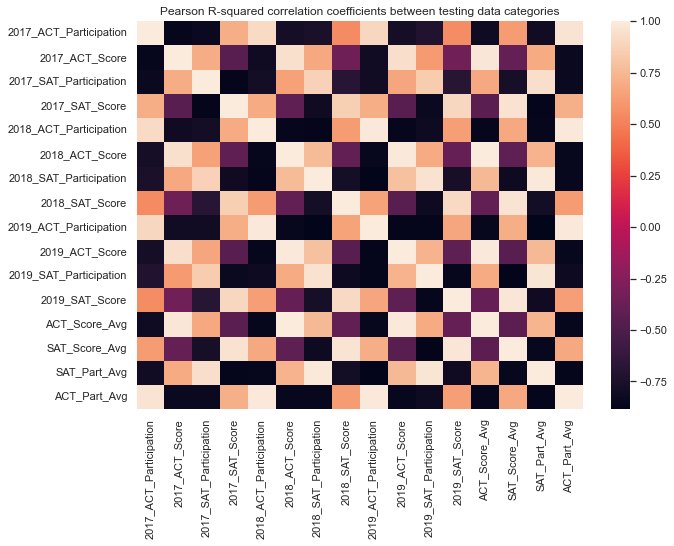

In [58]:
sns.set(rc={'figure.figsize':(10,10/1.4)})
heatmap_test_df = sns.heatmap(test_df.corr(), annot=False)\
.set(title = 'Pearson R-squared correlation coefficients between testing data categories',)
plt.savefig('../assets/heatmap.png',dpi=300, \
            bbox_inches='tight')

Here we see strong negative correlations between participation and score, that participation on tests is correlated throughout the years, and that the correlation between participation on the two tests is negative.

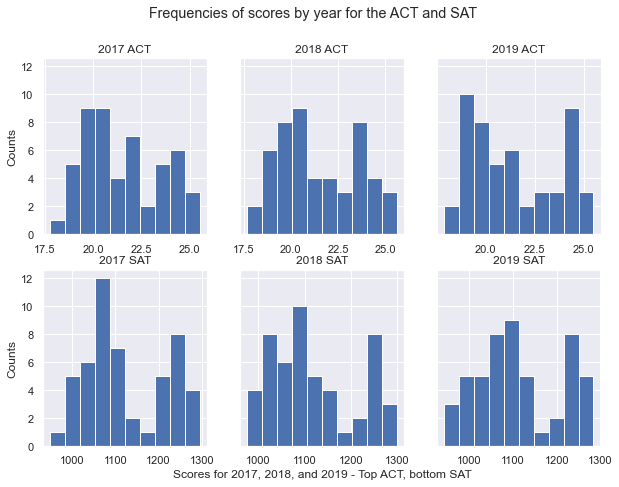

In [59]:
sns.set(rc={'figure.figsize':(10,10/1.4)})

years = ['2017','2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(2, 3,sharey=True)
fig.suptitle("Frequencies of scores by year for the ACT and SAT")
for i in [0,1]:
    for j in [0,1,2]:
        axs[i,j].hist(test_df[f'{years[j]}_{tests[i]}_Score'])
        axs[i,j].set_title(f'{years[j]} {tests[i]}')
        axs[i,0].set_ylabel('Counts')
        axs[1,1].set_xlabel('Scores for 2017, 2018, and 2019 - \
Top ACT, bottom SAT')
plt.savefig('../assets/ScoreFequencyHistograms.png',dpi=300, \
            bbox_inches='tight')

Here we see a distribution of test scores that is somewhat bimodal.  We can not assume that the underlying distribution of test scores is normal, and so using standard deviations to determine the likelihood, based solely on score, of a test observation is not possible.

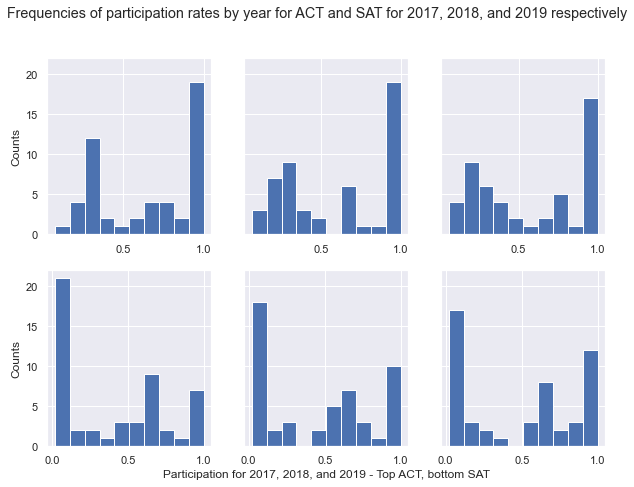

In [60]:
years = ['2017','2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(2, 3,sharey=True)
fig.suptitle("Frequencies of participation rates by year for ACT and SAT \
for 2017, 2018, and 2019 respectively")
for i in [0,1]:
    for j in [0,1,2]:
        axs[i,j].hist(test_df[f'{years[j]}_{tests[i]}_Participation'])
        axs[i,0].set_ylabel('Counts')
        axs[1,1].set_xlabel('Participation for 2017, 2018, and 2019 - \
Top ACT, bottom SAT')
plt.savefig('../assets/ParticipationFrequencies_Histograms.png',dpi=300, \
            bbox_inches='tight')

Here we see slightly declining participation in the ACT and a slight increase in participation in the SAT.  Note the lack of normality in the distributions, with the greatest densities for the SAT at the extreme low end and for the ACT at the extreme high end.  Reviewing the score distributions again, we may suspect that score adjusted for participation may be normally distributed.

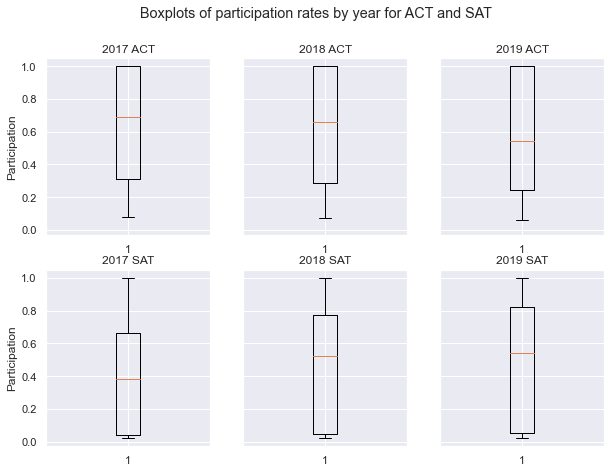

In [61]:
sns.set(rc={'figure.figsize':(10,10/1.4)})
years = ['2017','2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(2, 3,sharey=True)
fig.suptitle("Boxplots of participation rates by year for ACT and SAT")
for i in [0,1]:
    for j in [0,1,2]:
        axs[i,j].boxplot(test_df[f'{years[j]}_{tests[i]}_Participation'])
        axs[i,j].set_title(f'{years[j]} {tests[i]}')
        axs[i,0].set_ylabel('Participation')
plt.savefig('../assets/BoxplotParticipationRates.png',dpi=300, \
            bbox_inches='tight')

Here we again see ACT participation dropping off noticeably between 2017 and 2019 while SAT Scores see a corresponding rise.  Of note are the interquartile ranges.  From the output below, we can see ACT's median participation declines from .69 to .54 while the 25th percentile declines from .31 to .25.  Also, the mean participation drops slightly from .65 to .59.  While the median starts above the mean in 2017, suggesting a slight left skew in the data, the mean in 2019 is slightly above the median, suggesting a slight right skew.

For the SAT participation, between 2017 and 2019 the mean increases from .4 to .49, the median increases from .38 to .54, the 75th percentile increases from .66 to .82, and the 25th percentile increases slightly from .04 to .06.

In [62]:
test_df.iloc[:,0:-4:4].describe()

,2017_ACT_Participation,2018_ACT_Participation,2019_ACT_Participation
count,51.000000,51.000000,51.000000
mean,0.652549,0.617255,0.586667
std,0.321408,0.340371,0.345159
min,0.080000,0.070000,0.060000
25%,0.310000,0.285000,0.245000
50%,0.690000,0.660000,0.540000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


Above we see numerically the decline in mean ACT Participation fro .65 in 2017 to .59 in 2018.

In [63]:
test_df.iloc[:,1:-3:4].describe()

,2017_ACT_Score,2018_ACT_Score,2019_ACT_Score
count,51.000000,51.000000,51.000000
mean,21.519608,21.496078,21.464706
std,2.020695,2.111583,2.194523
min,17.800000,17.700000,17.900000
25%,19.800000,19.950000,19.800000
50%,21.400000,21.300000,21.100000
75%,23.600000,23.650000,23.700000
max,25.500000,25.600000,25.500000


Surprisingly, there is actually a slight decrease in mean ACT Scores despite declining participation.

In [64]:
test_df.iloc[:,2:-3:4].describe()

,2017_SAT_Participation,2018_SAT_Participation,2019_SAT_Participation
count,51.000000,51.000000,51.000000
mean,0.398039,0.457451,0.490588
std,0.352766,0.373143,0.387476
min,0.020000,0.020000,0.020000
25%,0.040000,0.045000,0.055000
50%,0.380000,0.520000,0.540000
75%,0.660000,0.775000,0.820000
max,1.000000,1.000000,1.000000


Again, the numerical analysis show the mean SAT participation increasing from 0.40 to 0.49.

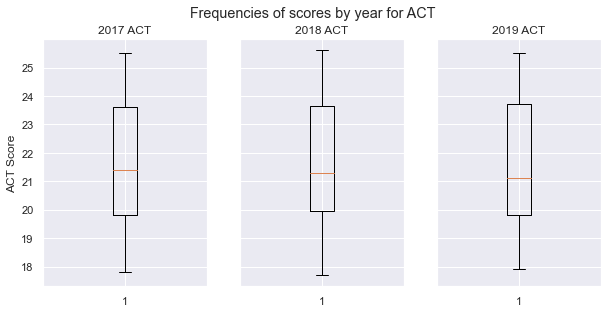

In [65]:
sns.set(rc={'figure.figsize':(10,10/2.2)})
years = ['2017','2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(1, 3,sharey=True)
fig.suptitle("Frequencies of scores by year for ACT")
# for i in [0]:
for j in [0,1,2]:
    axs[j].boxplot(test_df[f'{years[j]}_{tests[0]}_Score'])
    axs[j].set_title(f'{years[j]} {tests[0]}')
    axs[0].set_ylabel('ACT Score')
plt.savefig('../assets/BoxplotParticipationRates.png',dpi=300, \
            bbox_inches='tight')

As confirmed by the descriptive statistics below, ACT scores do not change much at all from year to year, with the mean falling from 21.52 to 21.46 and the median falling from 21.4 to 21.1.

In [66]:
test_df.iloc[:,1::4].describe()

,2017_ACT_Score,2018_ACT_Score,2019_ACT_Score,SAT_Score_Avg
count,51.000000,51.000000,51.000000,51.000000
mean,21.519608,21.496078,21.464706,1119.732026
std,2.020695,2.111583,2.194523,90.974771
min,17.800000,17.700000,17.900000,967.333333
25%,19.800000,19.950000,19.800000,1056.000000
50%,21.400000,21.300000,21.100000,1094.333333
75%,23.600000,23.650000,23.700000,1200.166667
max,25.500000,25.600000,25.500000,1292.333333


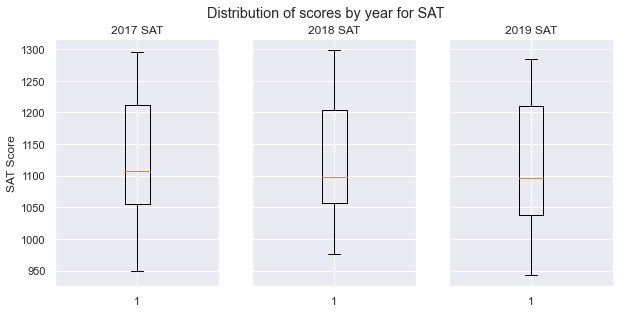

In [67]:
sns.set(rc={'figure.figsize':(10,10/2.2)})
years = ['2017','2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(1, 3,sharey=True)
fig.suptitle("Distribution of scores by year for SAT")
# for i in [0]:
for j in [0,1,2]:
    axs[j].boxplot(test_df[f'{years[j]}_{tests[1]}_Score'])
    axs[j].set_title(f'{years[j]} {tests[1]}')
    axs[0].set_ylabel('SAT Score')
plt.savefig('../assets/SAT_Score_boxplot.png',dpi=300, \
            bbox_inches='tight')

Overall the SAT test scores are not changing much here.  I don't think we would find statistical evidence that the score distributions are different.

In [68]:
test_df.iloc[:,3::4].describe()

,2017_SAT_Score,2018_SAT_Score,2019_SAT_Score,ACT_Part_Avg
count,51.000000,51.000000,51.000000,51.000000
mean,1126.098039,1120.019608,1113.078431,0.618824
std,92.494812,94.155083,97.197910,0.328698
min,950.000000,977.000000,943.000000,0.070000
25%,1055.500000,1057.500000,1038.000000,0.280000
50%,1107.000000,1098.000000,1097.000000,0.643333
75%,1212.000000,1204.000000,1210.000000,0.990000
max,1295.000000,1298.000000,1284.000000,1.000000


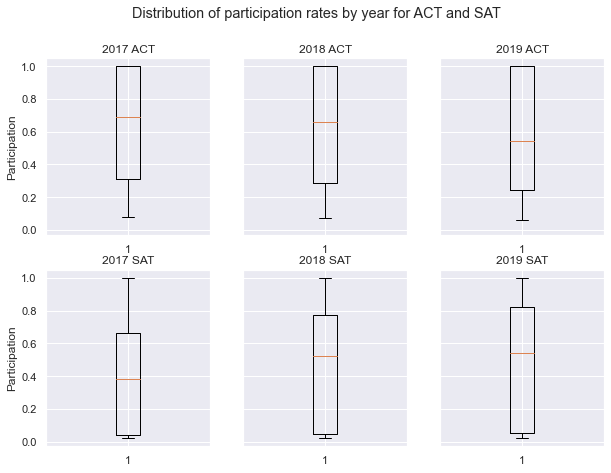

In [69]:
sns.set(rc={'figure.figsize':(10,10/1.4)})
years = ['2017','2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(2, 3,sharey=True)
fig.suptitle("Distribution of participation rates by year for ACT and SAT")
for i in [0,1]:
    for j in [0,1,2]:
        axs[i,j].boxplot(test_df[f'{years[j]}_{tests[i]}_Participation'])
        axs[i,j].set_title(f'{years[j]} {tests[i]}')
        axs[i,0].set_ylabel('Participation')
plt.savefig('../assets/Participation_boxplot.png',dpi=300, \
            bbox_inches='tight')

Above we see an inverse trend in the participation on the ACT and SAT, with SAT participation rising in its median and 75th percentile and the ACT participation fallin in its median and 25th percentile.

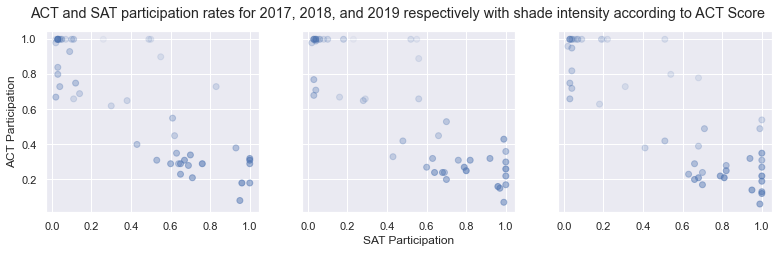

In [70]:
sns.set(rc={'figure.figsize':(13,10/3)})
years = ['2017','2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(1, 3,sharey=True)
fig.suptitle("ACT and SAT participation rates for 2017, 2018, and 2019 \
respectively with shade intensity according to ACT Score")


for j in [0,1,2]:
    axs[j].scatter(x=test_df[f'{years[j]}_SAT_Participation'],\
                     y = test_df[f'{years[j]}_ACT_Participation'],
                     alpha = (test_df[f'{years[j]}_ACT_Score']-17)/15)
    axs[0].set_ylabel('ACT Participation')
    axs[1].set_xlabel('SAT Participation')
plt.savefig('../assets/ACT_SAT_Participation_ShadedByACTScore.png',dpi=300, \
            bbox_inches='tight')

From the scatter plot we see that there appears to be an inverse relationship between SAT and ACT participation.  2018 and 2019 indicate shifts towards more states with near 100% SAT participation.  There is a cluster of states on the bottom right with high SAT and low ACT participation, while on the upper left there are a number of states with high ACT and low SAT participation. Looking at the shades determined by ACT Scores, the shades are darkest for the high SAT/low ACT participation groups as expected.   There is an interesting trend for the ACT score for a given ACT participation level to drop slightly as SAT participation rises, perhaps due to the conflicting demands on test prep focus. However, it is more likely to me that the interaction can be explained by students taking a different exam for a score improvement as opposed to re-taking the ACT.

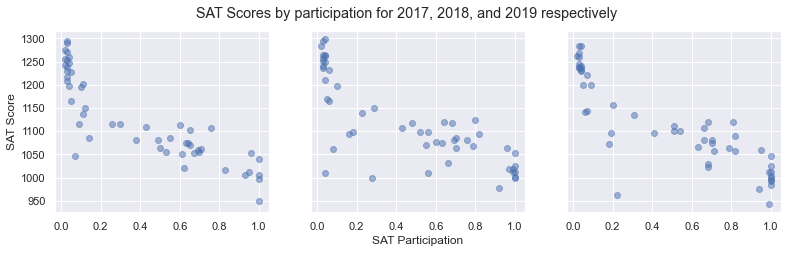

In [71]:
sns.set(rc={'figure.figsize':(13,10/3)})
years = ['2017','2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(1, 3,sharey=True)
fig.suptitle("SAT Scores by participation for 2017, 2018, and 2019 respectively")
# axs.set_ylabel('Proportion')


for j in [0,1,2]:
    axs[j].scatter(x=test_df[f'{years[j]}_SAT_Participation'],\
                     y = test_df[f'{years[j]}_SAT_Score'],
                     alpha = .5)
#     test_df[f'{years[j]}_ACT_Participation']/2
    # axs[j].set_title(f'{years[j]} {tests[i]}')
    axs[0].set_ylabel('SAT Score')
    axs[1].set_xlabel('SAT Participation')
    plt.savefig('../assets/SAT_scores_participation.png',dpi=300, bbox_inches='tight')

As expected we see here that SAT scores decline with participation, with a steep drop for participation above a 10%, whhich a more steady decline thereafter.  There is still significant variation of scores at all participation levels.

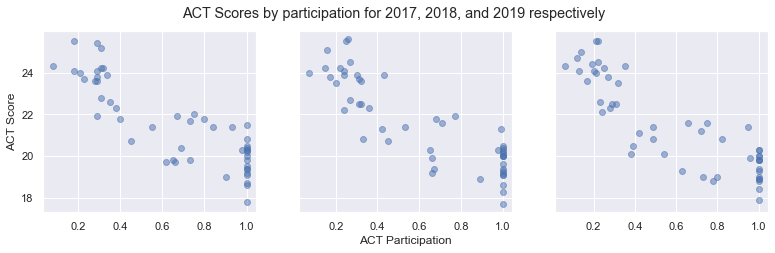

In [72]:
sns.set(rc={'figure.figsize':(13,10/3)})
years = ['2017','2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(1, 3,sharey=True)
fig.suptitle("ACT Scores by participation for 2017, 2018, and 2019 respectively")
# axs.set_ylabel('Proportion')


for j in [0,1,2]:
    axs[j].scatter(x=test_df[f'{years[j]}_ACT_Participation'],\
                     y = test_df[f'{years[j]}_ACT_Score'],
                     alpha = .5)
#     test_df[f'{years[j]}_ACT_Participation']/2
    # axs[j].set_title(f'{years[j]} {tests[i]}')
    axs[0].set_ylabel('ACT Score')
    axs[1].set_xlabel('ACT Participation')
    plt.savefig('../assets/ACT_scores_participation.png',dpi=300, bbox_inches='tight')

Here with the ACT we dont see a cluster of participation rates less than .1, but we do see significant variation in score regardless of participation.  We again see a steeper decline in scores as participation increases from low levels and a more steady decline after with a participation rate of aroun .4.  While the SAT had its highest density of participation close to zero, for the ACT the highest participation density is at 100%.  This highest density also characterizes a broad range of outcomes of almost four points for 2017 and 2018. 

In [73]:
test_delta = pd.DataFrame()
for i in range(4,12):
    test_delta[f'{test_df.columns[i]}_Change']=test_df.iloc[:,i]-test_df.iloc[:,i-4]
test_delta.head(5)


,2018_ACT_Participation_Change,2018_ACT_Score_Change,2018_SAT_Participation_Change,2018_SAT_Score_Change,2019_ACT_Participation_Change,2019_ACT_Score_Change,2019_SAT_Participation_Change,2019_SAT_Score_Change
State,,,,,,,,
Alabama,0.00,-0.1,0.01,1.0,0.00,-0.2,0.01,-23.0
Alaska,-0.32,1.0,0.05,26.0,0.05,-0.7,-0.02,-9.0
Arizona,0.04,-0.5,-0.01,33.0,0.07,-0.2,0.02,-15.0
Arkansas,0.00,0.0,0.02,-39.0,0.00,-0.1,0.01,-28.0
California,-0.04,-0.1,0.07,21.0,-0.04,-0.1,0.03,-11.0


The above generaged the test score and participation deltas between 2017 and 2018 as well as between 2018 and 2019.

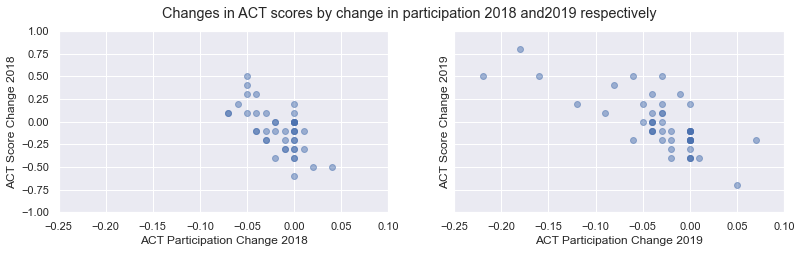

In [74]:
sns.set(rc={'figure.figsize':(13,10/3)})
years = ['2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(1, 2,sharey=True)
fig.suptitle("Changes in ACT scores by change in participation 2018 and\
2019 respectively")

for j in [0,1]:
    axs[j].scatter(x=test_delta[f'{years[j]}_ACT_Participation_Change'],\
                     y = test_delta[f'{years[j]}_ACT_Score_Change'],
                     alpha = .5)
    axs[j].set_ylabel(f'ACT Score Change {years[j]}')
    axs[j].set_xlabel(f'ACT Participation Change {years[j]}')
    axs[j].set_xlim([-.25,.1])
    axs[j].set_ylim([-1,1])
    plt.savefig('../assets/Deltas_ACT_scores_participation.png',dpi=300, bbox_inches='tight')

Here we see a fairly linear inverse relationship between ACT score change and the change in a state's yearly participation.  We can now have a higher level of confidence that increases in participation associate with decreasees in test scores.

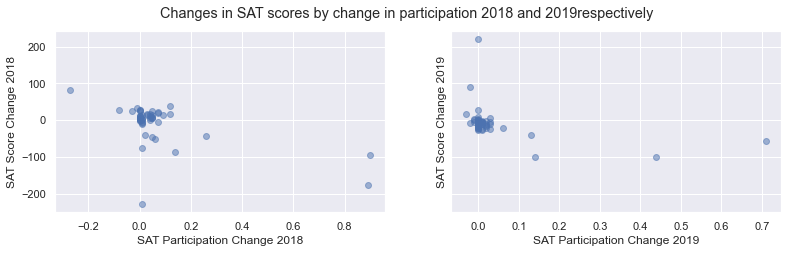

In [75]:
sns.set(rc={'figure.figsize':(13,10/3)})
years = ['2018','2019']
tests = ['ACT','SAT']
fig, axs = plt.subplots(1, 2,sharey=True)
fig.suptitle("Changes in SAT scores by change in participation 2018 and 2019\
respectively")

for j in [0,1]:
    axs[j].scatter(x=test_delta[f'{years[j]}_SAT_Participation_Change'],\
                     y = test_delta[f'{years[j]}_SAT_Score_Change'],
                     alpha = .5)
    axs[j].set_ylabel(f'SAT Score Change {years[j]}')
    axs[j].set_xlabel(f'SAT Participation Change {years[j]}')
    plt.savefig('../assets/Deltas_SAT_scores_participation.png',dpi=300,\
                    bbox_inches='tight')

In [76]:
print(test_delta[test_delta['2019_SAT_Score_Change']==220])
test_delta.describe()

       2018_ACT_Participation_Change  2018_ACT_Score_Change  \
State                                                         
Utah                             0.0                    0.1   

       2018_SAT_Participation_Change  2018_SAT_Score_Change  \
State                                                         
Utah                            0.01                 -228.0   

       2019_ACT_Participation_Change  2019_ACT_Score_Change  \
State                                                         
Utah                             0.0                   -0.1   

       2019_SAT_Participation_Change  2019_SAT_Score_Change  
State                                                        
Utah                             0.0                  220.0  


,2018_ACT_Participation_Change,2018_ACT_Score_Change,2018_SAT_Participation_Change,2018_SAT_Score_Change,2019_ACT_Participation_Change,2019_ACT_Score_Change,2019_SAT_Participation_Change,2019_SAT_Score_Change
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,-0.035294,-0.023529,0.059412,-6.078431,-0.030588,-0.031373,0.033137,-6.941176
std,0.134571,0.713187,0.182717,50.674587,0.050613,0.288090,0.117499,41.717340
min,-0.700000,-1.700000,-0.270000,-228.000000,-0.220000,-0.700000,-0.030000,-100.000000
25%,-0.040000,-0.300000,0.000000,-2.500000,-0.040000,-0.200000,0.000000,-19.500000
50%,-0.010000,-0.100000,0.010000,6.000000,-0.020000,-0.100000,0.000000,-8.000000
75%,0.000000,0.100000,0.050000,16.500000,0.000000,0.100000,0.020000,-2.000000
max,0.250000,3.100000,0.900000,82.000000,0.070000,0.800000,0.710000,220.000000


Surprisingly, the relationship between change in participation and change in scores very slight for the SAT in 2018 and almost non-existent in 2019.  However, there are few states with a drastic change, so it would be difficult to see a relationship if there is indeed one.  Of note are a few outliers/ high leverage points. One state with over a .7 change in participation in 2019 only saw around a 60 point decrease in SAT Scores while another with no change in participation saw a 220 point increase.  Upon investigating the 220 point increase we see that it is for Utah, which had a very low participation rate and also a decrease in SAT score of 228 in 2018.  Thus, the 2019 variation could be a reversion around the mean and due to natural variation.  However, further investigation is required due to the magnitude of the change.

In [77]:
test_df[test_df['ACT_Part_Avg']==1]['ACT_Score_Avg'].sort_values(ascending = False).index

Index(['Wisconsin', 'Utah', 'Montana', 'Kentucky', 'Wyoming', 'Tennessee',
       'Arkansas', 'Oklahoma', 'Louisiana', 'Alabama', 'North Carolina',
       'Mississippi', 'Nevada'],
      dtype='object', name='State')

This identifies states with full ACT participation.

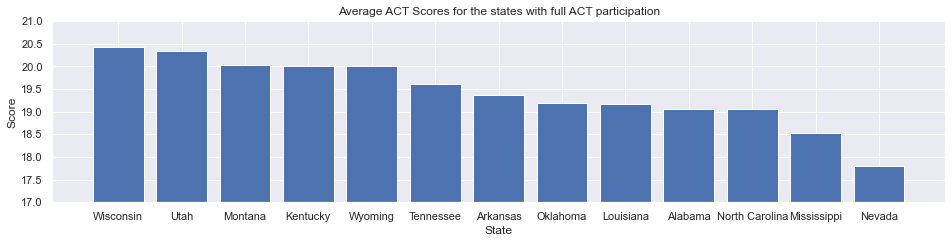

In [78]:
sns.set(rc={'figure.figsize':(16,10/3)})
fig, ax = plt.subplots()

p = ax.bar(x = test_df[test_df['ACT_Part_Avg']==1]['ACT_Score_Avg'].sort_values(ascending = False).index, \
        height = test_df[test_df['ACT_Part_Avg']==1]['ACT_Score_Avg'].sort_values(ascending = False).values)
ax.set_xlabel("State")
ax.set_ylabel("Score")
ax.set_title(label ="Average ACT Scores for the states with full ACT participation")
ax.set_ylim(17,21)

plt.savefig('../assets/Avg_ACT_Scores_Full_Participation.png',dpi=300,\
                    bbox_inches='tight')

Wisconsin Utah, and Nevada are identified here as either particularly well or particulary poorly performing states that could offer insights for improving educational outcomes.

In [79]:
test_df.loc['Nevada']

2017_ACT_Participation       1.000000
2017_ACT_Score              17.800000
2017_SAT_Participation       0.260000
2017_SAT_Score            1116.000000
2018_ACT_Participation       1.000000
2018_ACT_Score              17.700000
2018_SAT_Participation       0.230000
2018_SAT_Score            1140.000000
2019_ACT_Participation       1.000000
2019_ACT_Score              17.900000
2019_SAT_Participation       0.200000
2019_SAT_Score            1156.000000
ACT_Score_Avg               17.800000
SAT_Score_Avg             1137.333333
SAT_Part_Avg                 0.230000
ACT_Part_Avg                 1.000000
Name: Nevada, dtype: float64

In [80]:
test_df[test_df['SAT_Part_Avg']>.8]['SAT_Score_Avg'].sort_values(ascending = False)

State
New Hampshire           1058.000000
Connecticut             1046.666667
Rhode Island            1025.000000
Maine                   1012.666667
Michigan                1006.333333
Idaho                    999.666667
Delaware                 993.000000
District of Columbia     967.333333
Name: SAT_Score_Avg, dtype: float64

These are the numerical average SAT results of a filter for states with an average participation above .8.

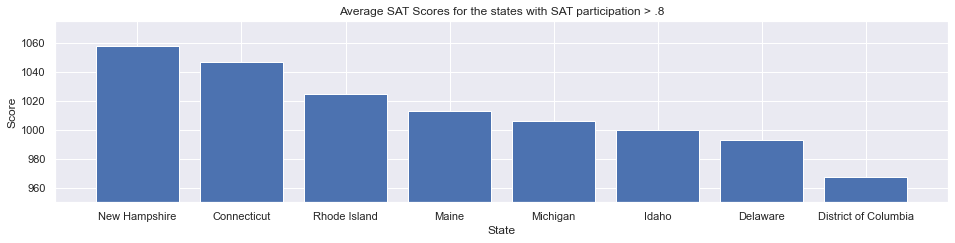

In [81]:
sns.set(rc={'figure.figsize':(16,10/3)})
fig, ax = plt.subplots()

p = ax.bar(x = test_df[test_df['SAT_Part_Avg']>.8]['SAT_Score_Avg'].sort_values(ascending = False).index, \
        height = test_df[test_df['SAT_Part_Avg']>.8]['SAT_Score_Avg'].sort_values(ascending = False).values)
ax.set_xlabel("State")
ax.set_ylabel("Score")
ax.set_title(label ="Average SAT Scores for the states with SAT participation > .8")
ax.set_ylim(950,1075)
plt.savefig('../assets/Avg_SAT_Scores_Participation>.8.png',dpi=300,\
                    bbox_inches='tight')

New Hampshire, Connecticut, and D.C. appear to be worth futher investigation.

In [82]:
test_df.loc['District of Columbia',]

2017_ACT_Participation      0.320000
2017_ACT_Score             24.200000
2017_SAT_Participation      1.000000
2017_SAT_Score            950.000000
2018_ACT_Participation      0.320000
2018_ACT_Score             23.600000
2018_SAT_Participation      0.920000
2018_SAT_Score            977.000000
2019_ACT_Participation      0.320000
2019_ACT_Score             23.500000
2019_SAT_Participation      0.940000
2019_SAT_Score            975.000000
ACT_Score_Avg              23.766667
SAT_Score_Avg             967.333333
SAT_Part_Avg                0.953333
ACT_Part_Avg                0.320000
Name: District of Columbia, dtype: float64

Upon inspecting D.C., there is not tremendous variation of scores independent of participation changes, indicating that this state is indeed worth looking into.

## Conclusions and Recommendations

I recommend making case studies of all the states that consistently perform particularly well given their level of participation. 

For the ACT, Wisconsin with 20.43 and Utah with 20.33 had an edge over the other states that shared their 100% ACT participation accross all years.  Nevada, with an ACT score of 17.80, would be worthwhile investigating as a counterexample.  

For the SAT, there were fewer states with extremely high participation.  However, New Hampshire's score of 1058 (.96 participation) and Connecticut's score of 1047 (full participation) are notable.  In contrast, the Distric of Columbia's SAT average score of 967 (.95 participation) is the lowest in the data and also beckons inquiry.

I also recommend choosing a stardardized test as a benchmark exam and pursuing school district wide legislation making graduation conditional on participation on this exam.  Selecting one particular exam, either the ACT or SAT, would enable the easier formation of study groups and allow for teachers to direct some time to test-specific preparation.  With full participation, analysis of school performance will be not be impacted by selection bias.

After this preliminary report I have a solid foundation upon which I can further investigate past interventions, examine the education literature, and looking at further metrics of high school outcomes such as dropout rates.  Dropout rates are an important considerated with respect to this analysis, as only the scores of graduates were aggregated for each state. Thus, simply making a high score a graduation requirement would improve the optics based on the data examined in this report, but it would not improve the overall outcome.